In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [129]:
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv")
df.index = df['vendor']+' '+df['model']
df.drop(['vendor', 'model'], axis=1, inplace=True)
df['cs'] = np.round(1e3/df['myct'], 2)	# clock speed in MHz 
df.sample(4)

,myct,mmin,mmax,cach,chmin,chmax,prp,erp,cs
cambex 1636-1,50,1000,4000,8,3,5,26,30,20.00
basf 7/68,50,4000,16000,65,1,8,138,117,20.00
honeywell dps:8/50,140,2000,8000,32,1,54,66,57,7.14
ncr v8595:ii,56,4000,16000,0,1,8,46,78,17.86


In [130]:
'''
Functions
'''
def MSE(actual, predict):
    return ((predict - actual)**2).mean()

def RMSE(actual, predict):
    return np.sqrt(MSE(actual, predict))

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

<AxesSubplot:xlabel='cs', ylabel='prp'>

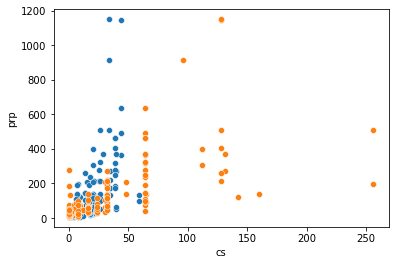

In [131]:
sns.scatterplot(x='cs', y = 'prp', data=df)
sns.scatterplot(x='cach', y='prp', data=df)

In [132]:
# 2. From the machine data, create training and test sets, using a 70/30 split.  See the linear regression 2 slides if needed.
x = df[['cach', 'cs']].values
y = df['prp'].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [133]:
# 3. This lab is open-ended.  I want you to experiment with building linear models using interactions and nonlinear transformations, as discussed in class.  The goal is still to predict performance (feature ‘prp’).  Start simple.
reg = LinearRegression()
# scores = -cross_val_score(reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
# print(scores.mean())
reg.fit(x_train, y_train)
predictions = reg.predict(x_test)
print(f'R-score: {reg.score(x,y):.3f}')
print(f'RMSE: {RMSE(y_test, predictions):.3f}')
print(f'bias: {reg.intercept_} w0: {reg.coef_[0]} w1: {reg.coef_[1]}')

R-score: 0.518
RMSE: 176.536
bias: 7.258603051010155 w0: 1.4706234111588674 w1: 3.6912670449553993


(-50.0, 1200.0)

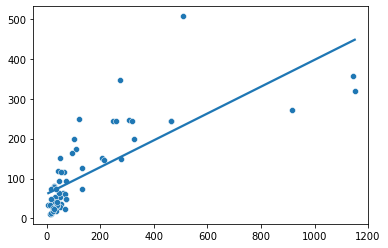

In [134]:
# plot model with regression line
sns.scatterplot(y_test, predictions)
sns.regplot(y_test, predictions, ci=None, scatter=False)
plt.xlim([-50, 1200])


In [135]:
pf = PolynomialFeatures(degree=2, include_bias=False)
pf.fit(x)
x_poly = pf.transform(x)
# # pf.get_feature_names()
reg2 = LinearRegression()
reg2.fit(x_poly, y)
predictions2 = reg2.predict(x_poly)
print(f'R-score: {reg2.score(x_poly, y):.3f}')

R-score: 0.667


[ 1.44588379  0.12440095 -0.00884835  0.09741926  0.02493268]


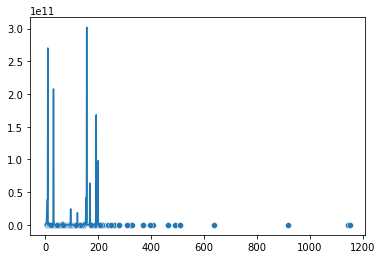

In [136]:
# plot model with regression line
sns.scatterplot(y, predictions2)
# sns.regplot(y, predictions2, ci=None)
print(reg2.coef_)
plt.plot(np.polyval(reg2.coef_, predictions2)) ''' How do i plot these better? '''
# plt.ylim([-0.5, 0.5])

degree = np.arange(0,21)
train_score, val_score = validation_curve(PolynomialRegression(), x, y, 'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')


In [137]:
# 4. Predict prp using your test set, and write your own code to compute the RMSE. 
print(f'Test without polyfeatures RMSE: {RMSE(y_test, predictions):.3f}')

Test without polyfeatures RMSE: 176.536
RMSE with 2 degree ployfeature: 92.605


In [138]:
# 5. For each experiment, I want you to pick some features, transform them in some way (or not at all), and then build a linear model using the training data.  Write down the RMSE you get on the test data.  Note: if you transform ‘prp’, you will need to account for that when you compute RMSE!
print(f'RMSE with 2 degree ployfeature: {RMSE(y, predictions2):.3f}')

In [139]:
# 6. See which features and transformations give you the best RMSE scores.
'''
Adding a 2 degree polyfeature to my predictors almost cut my RMSE in half.
'''